In [5]:
from random import random
from numpy import array
from numpy import cumsum

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	return X, y

In [6]:
X, y = get_sequence(10)
print(X)
print(y)

[0.06125469 0.68628006 0.08554434 0.52711939 0.64567707 0.74358257
 0.17502314 0.820115   0.50668827 0.16199572]
[0 0 0 0 0 1 1 1 1 1]


In [8]:
# reshape input and output data to be suitable for LSTMs
n_timesteps = 10
X = X.reshape(1, n_timesteps, 1)
y = y.reshape(1, n_timesteps, 1)

In [9]:
# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

In [13]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.utils import to_categorical
from keras.optimizers import Adam
import pickle
import numpy as np
import os

In [14]:
model = Sequential()
model.add(LSTM(20, input_shape=(10, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)

1/1 - 2s - loss: 0.6880 - accuracy: 0.6000 - 2s/epoch - 2s/step
1/1 - 0s - loss: 0.6888 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6872 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6993 - accuracy: 0.2000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6897 - accuracy: 0.4000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6771 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6804 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6916 - accuracy: 0.4000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6635 - accuracy: 0.7000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6886 - accuracy: 0.4000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6690 - accuracy: 0.6000 - 3ms/epoch - 3ms/step
1/1 - 0s - loss: 0.6737 - accuracy: 0.5000 - 3ms/epoch - 3ms/step
1/1 - 0s - loss: 0.6666 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6522 - accuracy: 0.7000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6692 - accuracy: 0.5000 - 3ms/epoch - 3ms/step
1/1 - 0s - l

In [20]:
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict(X, verbose=0)
yhat = np.round(yhat).astype(int)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]


In [21]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

# define problem properties
n_timesteps = 10
# define LSTM
model = Sequential()
model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict(X, verbose=0)
yhat = np.round(yhat).astype(int)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

1/1 - 1s - loss: 0.6862 - accuracy: 0.6000 - 1s/epoch - 1s/step
1/1 - 0s - loss: 0.6868 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6872 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6847 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6667 - accuracy: 0.7000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6739 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6806 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6735 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6717 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6720 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6441 - accuracy: 0.7000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.7051 - accuracy: 0.3000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6623 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6658 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6296 - accuracy: 0.7000 - 4ms/epoch - 4ms/step
1/1 - 0s - l

In [ ]:
##### Bidirectional LSTM For Sequence Classification #####


In [23]:
from keras.layers import Bidirectional

model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))

In [24]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

# define problem properties
n_timesteps = 10
# define LSTM
model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict(X, verbose=0)
yhat = np.round(yhat).astype(int)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

1/1 - 3s - loss: 0.7021 - accuracy: 0.4000 - 3s/epoch - 3s/step
1/1 - 0s - loss: 0.6908 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6948 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6849 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6748 - accuracy: 0.7000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6802 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6764 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6888 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6781 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6784 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6750 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6834 - accuracy: 0.6000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6709 - accuracy: 0.6000 - 5ms/epoch - 5ms/step
1/1 - 0s - loss: 0.6890 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6636 - accuracy: 0.7000 - 5ms/epoch - 5ms/step
1/1 - 0s - l

In [25]:
##### Compare LSTM to Bidirectional LSTM #####

In [26]:
def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [27]:
def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [28]:
def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss

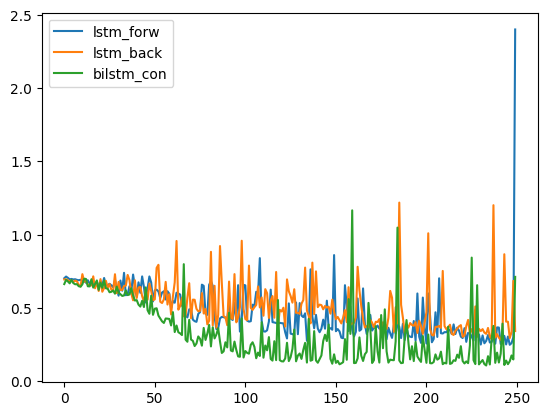

In [29]:
from random import random
from numpy import array
from numpy import cumsum
from matplotlib import pyplot
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss


n_timesteps = 10
results = DataFrame()
# lstm forwards
model = get_lstm_model(n_timesteps, False)
results['lstm_forw'] = train_model(model, n_timesteps)
# lstm backwards
model = get_lstm_model(n_timesteps, True)
results['lstm_back'] = train_model(model, n_timesteps)
# bidirectional concat
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()

In [30]:
##### Comparing Bidirectional LSTM Merge Modes #####

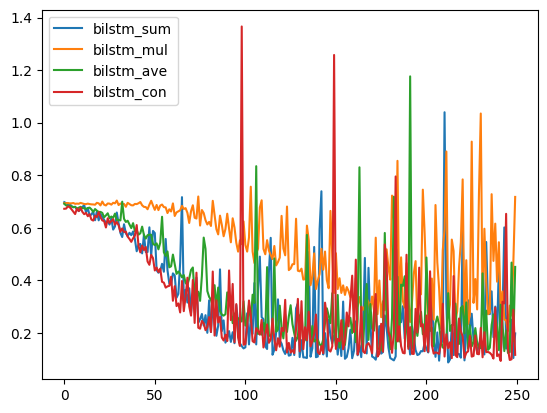

In [31]:
n_timesteps = 10
results = DataFrame()
# sum merge
model = get_bi_lstm_model(n_timesteps, 'sum')
results['bilstm_sum'] = train_model(model, n_timesteps)
# mul merge
model = get_bi_lstm_model(n_timesteps, 'mul')
results['bilstm_mul'] = train_model(model, n_timesteps)
# avg merge
model = get_bi_lstm_model(n_timesteps, 'ave')
results['bilstm_ave'] = train_model(model, n_timesteps)
# concat merge
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()